## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.value_counts("APPLICATION_TYPE")
app_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts < 200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.value_counts("CLASSIFICATION")
class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
bigger_class_counts = class_counts[class_counts > 1]
bigger_class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C1720        6
C4100        6
C2400        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C1267        2
C1246        2
C1256        2
C3200        2
C1234        2
dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_counts[class_counts < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies_df = pd.get_dummies(application_df)
app_dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = app_dummies_df["IS_SUCCESSFUL"].values
X = app_dummies_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# changed number of nodes in layers
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 400       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


2022-06-01 12:20:46.873711: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 12:20:46.884690: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 90us/sample - loss: 0.6144 - accuracy: 0.6832
Epoch 2/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5706 - accuracy: 0.7241
Epoch 3/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5620 - accuracy: 0.7278
Epoch 4/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5585 - accuracy: 0.7282
Epoch 5/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5565 - accuracy: 0.7282
Epoch 6/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5552 - accuracy: 0.7284
Epoch 7/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5543 - accuracy: 0.7294
Epoch 8/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5534 - accuracy: 0.7300
Epoch 9/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5526 - accuracy: 0.7302
Epoch

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5410 - accuracy: 0.7294
Loss: 0.5502956149112379, Accuracy: 0.7294460535049438


In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# added layer and changed epochs
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4


nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 400       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn1.fit(X_train_scaled,y_train,epochs=75)

Train on 25724 samples
Epoch 1/75
25724/25724 [==============================] - 8s 308us/sample - loss: 0.6445 - accuracy: 0.6004
Epoch 2/75
25724/25724 [==============================] - 4s 162us/sample - loss: 0.5859 - accuracy: 0.7232
Epoch 3/75
25724/25724 [==============================] - 5s 194us/sample - loss: 0.5700 - accuracy: 0.7280
Epoch 4/75
25724/25724 [==============================] - 6s 240us/sample - loss: 0.5647 - accuracy: 0.7289
Epoch 5/75
25724/25724 [==============================] - 3s 97us/sample - loss: 0.5625 - accuracy: 0.7302
Epoch 6/75
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5609 - accuracy: 0.7310
Epoch 7/75
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5599 - accuracy: 0.7312
Epoch 8/75
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5584 - accuracy: 0.7321
Epoch 9/75
25724/25724 [==============================] - 3s 114us/sample - loss: 0.5577 - accuracy: 0.7320
Epoch 10/

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5441 - accuracy: 0.7279
Loss: 0.5598515594665928, Accuracy: 0.7279300093650818


In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# changing neurons and activation
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  14
hidden_nodes_layer2 = 8


nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 14)                700       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 5s 185us/sample - loss: 0.5986 - accuracy: 0.7002
Epoch 2/50
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5600 - accuracy: 0.7244
Epoch 3/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5540 - accuracy: 0.7285
Epoch 4/50
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5519 - accuracy: 0.7292
Epoch 5/50
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5503 - accuracy: 0.7296
Epoch 6/50
25724/25724 [==============================] - 4s 149us/sample - loss: 0.5494 - accuracy: 0.7305
Epoch 7/50
25724/25724 [==============================] - 4s 154us/sample - loss: 0.5486 - accuracy: 0.7315
Epoch 8/50
25724/25724 [==============================] - 4s 153us/sample - loss: 0.5472 - accuracy: 0.7316
Epoch 9/50
25724/25724 [==============================] - 6s 222us/sample - loss: 0.5475 - accuracy: 0.7316
Epoch 10/

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5467 - accuracy: 0.7291
Loss: 0.5512710278235788, Accuracy: 0.7290962338447571


<AxesSubplot:>

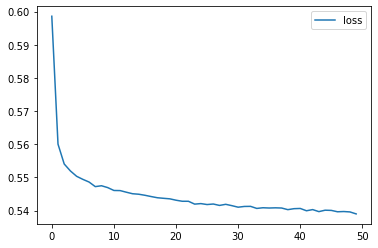

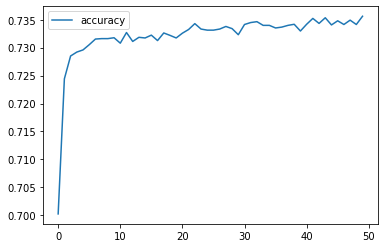

In [31]:
# Plot the accuracy
history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [30]:
# Export our model to HDF5 file
nn.save("../Resources/AlphabetSoupCharity_Optimization1.h5")
nn1.save("../Resources/AlphabetSoupCharity_Optimization2.h5")
nn2.save("../Resources/AlphabetSoupCharity_Optimization3.h5")